In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
dataset = pd.read_csv('star_classification.csv')
X = dataset.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17]].values
y = dataset.iloc[:, 13].values
print(X)
print(y)

[[1.35689107e+02 3.24946318e+01 2.38788200e+01 ... 5.81200000e+03
  5.63540000e+04 1.71000000e+02]
 [1.44826101e+02 3.12741849e+01 2.47775900e+01 ... 1.04450000e+04
  5.81580000e+04 4.27000000e+02]
 [1.42188790e+02 3.55824442e+01 2.52630700e+01 ... 4.57600000e+03
  5.55920000e+04 2.99000000e+02]
 ...
 [2.24587407e+02 1.57007074e+01 2.11691600e+01 ... 2.76400000e+03
  5.45350000e+04 7.40000000e+01]
 [2.12268621e+02 4.66603653e+01 2.53503900e+01 ... 6.75100000e+03
  5.63680000e+04 4.70000000e+02]
 [1.96896053e+02 4.94646428e+01 2.26217100e+01 ... 7.41000000e+03
  5.71040000e+04 8.51000000e+02]]
['GALAXY' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


In [61]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(x_test)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [63]:
"""from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
x_test = pca.transform(x_test)"""

'from sklearn.decomposition import PCA\npca = PCA(n_components=2)\nX_train = pca.fit_transform(X_train)\nx_test = pca.transform(x_test)'

In [64]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
y_pred = classifier.fit(X_train, y_train)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score 
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10196  1531   124]
 [  476  3356     3]
 [    5     0  4309]]


0.89305

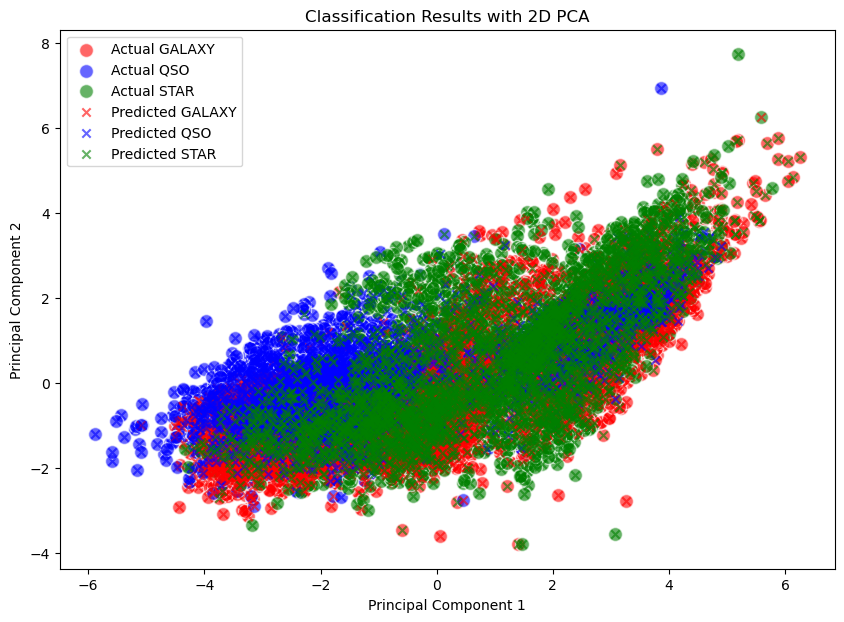

0.85275

In [66]:
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA


# Assuming class names for labels 0, 1, 2
class_names = {'GALAXY': 0, "QSO":1, "STAR":2}
class_names_for_legend = {0:'GALAXY' , 1:"QSO", 2:"STAR"}
colors = {0: 'red', 1: 'blue', 2: 'green'}


# Reduce dimensions to 2D using PCA
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(x_test)

# Retrain the classifier with reduced dimensions
classifier_2d = XGBClassifier()
classifier_2d.fit(X_train, y_train)

# Predict with reduced dimensions
y_pred = classifier_2d.predict(X_test)

# Plot the results with legends
plt.figure(figsize=(10, 7))

# Plot actual labels
for label in np.unique(y_test):
    plt.scatter(X_test[y_test == label, 0], X_test[y_test == label, 1], 
                label=f'Actual {class_names_for_legend[label]}', alpha=0.6, edgecolors='w', s=100, color=colors[label])

# Plot predicted labels
for label in np.unique(y_pred):
    plt.scatter(X_test[y_pred == label, 0], X_test[y_pred == label, 1], 
                marker='x', label=f'Predicted {class_names_for_legend[label]}', alpha=0.6, color=colors[label])

plt.title('Classification Results with 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()
accuracy_score(y_test, y_pred)